In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

## Load data

In [2]:
from helper import load_data, normalize_data

data = load_data()
data.shape

(272, 2)

### Initialize your cluster centers

In [3]:
def initialize_clusters(data, k):
    """initialize the k cluster centers (the means).
    input:
        data: original data with shape (num_sample, num_feature).
        k: predefined number of clusters for the k-means algorithm.
    output:
        a numpy array with shape (k, num_feature)
    """
    num_sample, num_feature = data.shape
    # Randomly choose data points as centers.
    random_means = data[np.random.randint(0, num_sample, k)]
    return random_means
mu_test = initialize_clusters(data, 10)

### Update k-means parameters

#### Build distance matrix
Build a distance matrix, collecting the distances of the original dataset to the means of the clusters.

NOTE: once you finish your `build_distance_matrix`, please copy the function to the `helper.py` function. Otherwise, the `kmeans` function will not work.

In [67]:
def build_distance_matrix(data, mu):
    """build a distance matrix.
    return
        distance matrix:
            row of the matrix represents the data point,
            column of the matrix represents the k-th cluster.
    """
    # Use tensor broadcasting to efficiently compute the square Euclidean distance
    distance = np.sum((data[:,None,:] - mu)**2, axis = 2)
    return distance
build_distance_matrix(data, mu_test);

#### Update k-means parameters

In [68]:
def update_kmeans_parameters(data, mu_old):
    """update the parameter of kmeans
    return:
        losses: loss of each data point with shape (num_samples, 1)
        assignments: assignments vector z with shape (num_samples, 1) # That is not vector z
        mu: mean vector mu with shape (k, num_features)
    """
    distances = build_distance_matrix(data, mu_old) #Reecast onto arrays since my code relies on it
    losses = np.min(distances, axis = 1)
    z = (distances==losses[:,None])
    mu = z.T.dot(data) / np.sum(z, axis=0)[:,None]
    assignments = np.argmax(z, axis = 1)
    return losses, assignments, mu
update_kmeans_parameters(data, mu_test);


#### Play with k-means

The current iteration of k-means is: 0,                the average loss is 155.76844945220589.


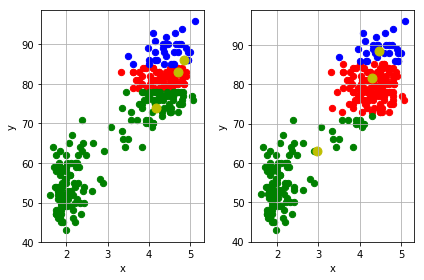

The current iteration of k-means is: 1,                the average loss is 49.910147141887194.


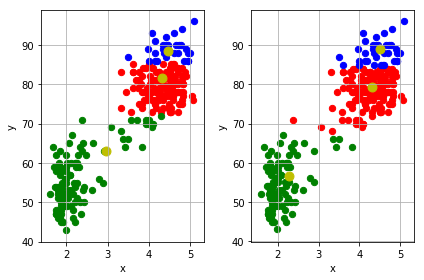

The current iteration of k-means is: 2,                the average loss is 23.950569212543318.


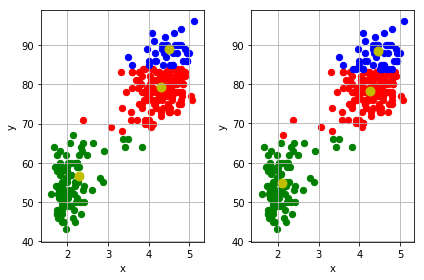

The current iteration of k-means is: 3,                the average loss is 21.490792147675005.


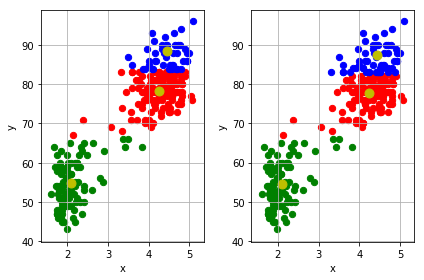

The current iteration of k-means is: 4,                the average loss is 20.737748825642.


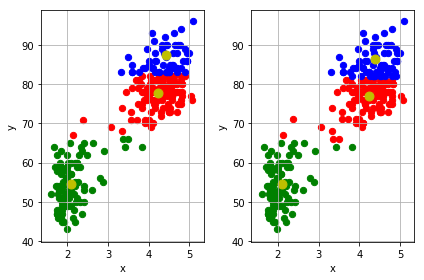

The current iteration of k-means is: 5,                the average loss is 19.99872173815915.


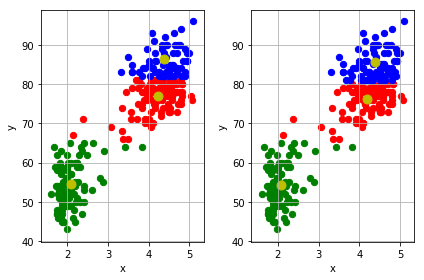

The current iteration of k-means is: 6,                the average loss is 19.538747747509.


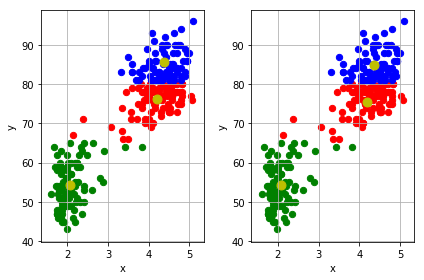

The current iteration of k-means is: 7,                the average loss is 19.22448102947865.


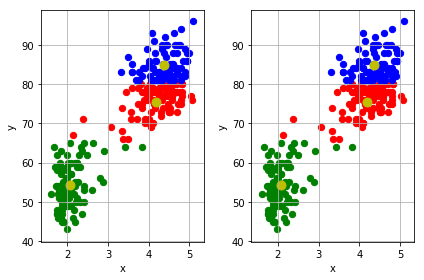

The current iteration of k-means is: 8,                the average loss is 19.22448102947865.


In [69]:
from helper import build_dir
from plots import plot

def kmeans(data, k, max_iters, threshold):
    """run the k-means algorithm."""
    output_figure = "kmeans_figures/"
    # initialize the cluster.
    mu_old = initialize_clusters(data, k)
    # init some empty lists to store the result.
    loss_list = []

    # start the kmeans algorithm.
    for iter in range(max_iters):
        # update z and mu
        losses, assignments, mu = update_kmeans_parameters(data, mu_old)
        # calculate the average loss over all points
        average_loss = np.mean(losses)
        loss_list.append(average_loss)
        print("The current iteration of k-means is: {i}, \
               the average loss is {l}.".format(i=iter, l=average_loss))
        # check converge
        if iter > 0 and np.abs(loss_list[-1] - loss_list[-2]) < threshold:
            break
        # output plot
        plot(data, mu, mu_old, output_figure + "kmean_iter{i}".format(i=iter))
        # update k-means information.
        mu_old = mu

# define parameters
k = 3
max_iters = 100
threshold = 1e-5
output_figure = "kmeans_figures/"

# build figure dir
build_dir(output_figure)

# run kmeans algorithm
kmeans(data, k, max_iters, threshold)

## Using k-means for image compresson

#### load image

In [70]:
from helper import load_image

image_path = "mandrill.png"
original_image = load_image(image_path)
print(
    "Original image: the shape of image={s}, the data type={dt}.".format(
        s=original_image.shape, dt=original_image.dtype))

Original image: the shape of image=(480, 480, 3), the data type=uint8.


#### preprocess image

In [80]:
def preprocess_image(original_image):
    """preprocess the image."""  
    processed_image = original_image.reshape(-1,3)
    return processed_image.astype(float) #Overflow if using unsigned int

processed_image = preprocess_image(original_image)

The current iteration of k-means is: 0,                the average loss is 4867.457916666666.
The current iteration of k-means is: 10,                the average loss is 1632.8163214871427.
The current iteration of k-means is: 20,                the average loss is 1631.9772570635469.
The current iteration of k-means is: 30,                the average loss is 1631.969178243978.


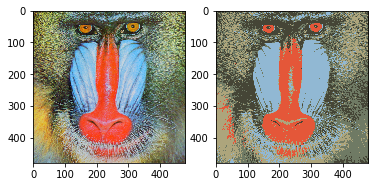

<Figure size 432x288 with 0 Axes>

In [86]:
from plots import plot_image_compression

def kmean_compression(original_image, processed_image, k, max_iters, threshold):
    """using k-means for image compression."""
    
    # initialize the cluster.
    mu_old = initialize_clusters(processed_image, k)
    # init some empty lists to store the result.
    loss_list = []
    # start the kmeans algorithm.
    for iter in range(max_iters):
        # update z and mu
        losses, assignments, mu = update_kmeans_parameters(processed_image, mu_old)
        # calculate the average loss over all points
        average_loss = np.mean(losses)
        loss_list.append(average_loss)
        if iter % 10 == 0:
            print("The current iteration of k-means is: {i}, \
               the average loss is {l}.".format(i=iter, l=average_loss))
        # check converge
        if iter > 0 and np.abs(loss_list[-1] - loss_list[-2]) < threshold:
            break
        # update k-means information.
        mu_old = mu
    # plot histogram
    plot_image_compression(original_image, processed_image, assignments, mu, k)

# define parameters
k = 5
max_iter = 100
threshold = 1e-6

# use kmeans to compress image
kmean_compression(original_image, processed_image, k, max_iter, threshold)